In [1]:
import pandas as pd
import numpy as np
from src import pre_process
from src import denseNet2
from PIL import Image
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = 3000000000 

train1 = pd.read_csv("../Final-IRONHACK-Project/data/train1.csv")
train_x, valid_x, train_y, valid_y = pre_process.train_valid_split(train1)

train_generator, validation_generator = pre_process.image_generator()



Found 96 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [2]:
dense_net_model = denseNet2.YourDenseNetModel()

dense_net_model.build_densenet_model()

dense_net_model.set_generators(train_generator, validation_generator)

history = dense_net_model.train(train_x, epochs=2, batch_size=5)

Epoch 1/2
121/121 [==============================] - 1229s 10s/step - loss: 1.4028 - accuracy: 0.4583 - val_loss: 0.6876 - val_accuracy: 0.6000 - lr: 0.0010


In [3]:
training_loss = history.history['loss']
print("The training loss is of:", training_loss)
validation_loss = history.history['val_loss']
print("The validation loss is of:",validation_loss)
training_accuracy = history.history['accuracy']
print("The training accuracy is of:", training_accuracy)
validation_accuracy = history.history['val_accuracy']
print("The validation accuracy is of:", validation_accuracy)

The training loss is of: [1.4028018712997437]
The validation loss is of: [0.6876156330108643]
The training accuracy is of: [0.4583333432674408]
The validation accuracy is of: [0.6000000238418579]


In [4]:
dense_net_model.get_weights('../Final-IRONHACK-Project/data/Dense_weights.h5')

In [5]:
batch_size = 5
evaluation_result = dense_net_model.evaluation(batch_size)
print("Evaluation Result:", evaluation_result)

class_names = [0, 1]
dense_net_model.predict_densenet(class_names)

5/5 [==============================] - 198s 39s/step - loss: 0.7056 - accuracy: 0.5000
Evaluation Result: [0.7055675387382507, 0.5]
1/1 [==============================] - 0s 193ms/step


`Predict on new images:`

In [6]:
dense_net_model.load_weights('../Final-IRONHACK-Project/data/Dense_weights.h5')

In [7]:
from tensorflow.keras.preprocessing import image

# Image preprocessing

test_path = ["D:/bootcamp/test/006388_0.tif","D:/bootcamp/test/008e5c_0.tif", "D:/bootcamp/test/00c058_0.tif", "D:/bootcamp/test/01adc5_0.tif"]

preprocessed_images = []
for img_path in test_path:
    img = image.load_img(img_path, target_size=(380, 380))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    preprocessed_images.append(img_array)

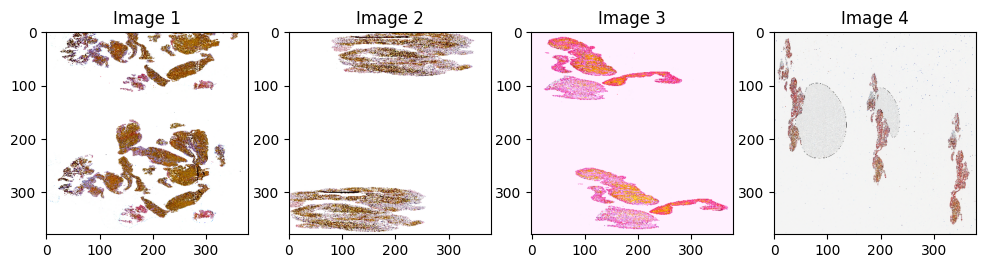

In [8]:
fig, axes = plt.subplots(1, len(test_path), figsize=(12, 4))

for i, img_path in enumerate(test_path):
    img = image.load_img(img_path, target_size=(380, 380))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Plot the preprocessed image
    axes[i].imshow(img_array[0])
    axes[i].set_title(f'Image {i+1}')

plt.show()


In [9]:
class_names = [0,1]
for img in preprocessed_images:
    predictions = dense_net_model.predict_on_data(img, class_names)
    print(predictions)

1/1 [==============================] - 0s 89ms/step
[[0.999423]]
1/1 [==============================] - 0s 51ms/step
[[0.99941874]]
1/1 [==============================] - 0s 51ms/step
[[0.99941397]]
1/1 [==============================] - 0s 49ms/step
[[0.9994134]]
